## Household Income Analysis

#### Lifecycle of a Macine Learning Project
- Understanding the problem statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose the best model

### 1) Problem Statement
- This project understands how the house income is affected by other variables such as age, education level, occupation, number of dependents, location.




### 2) Data Collection
- Data Source - https://www.kaggle.com/datasets/stealthtechnologies/regression-dataset-for-household-income-analysis/data
- The data consists of 14 collumns and 10000 rows

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import CSV Dataset into the Pandas Dataframe

In [5]:
df = pd.read_csv('Dataset/Household Income.csv')

#### Show top 5 records

In [6]:
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


#### Shape of the dataset

In [7]:
df.shape

(10000, 14)

### 2.2 Dataset Information

- Age : Age of the primary household member (18 to 70 years).
- Education Level : Highest education level attained (High School, Bachelor's, Master's, Doctorate).
- Occupation : Type of occupation (Healthcare, Education, Technology, Finance, Others).
- Number of Dependents : Number of dependents in the household (0 to 5).
- Location : Residential location (Urban, Suburban, Rural).
- Work Experience : Years of work experience (0 to 50 years).
- Marital Status : Marital status of the primary household member (Single, Married, Divorced).
- Employment Status : Employment status of the primary household member (Full-time, Part-time, Self-employed).
- Household Size : Total number of individuals living in the household (1 to 7).
- Homeownership Status : Homeownership status (Own, Rent).
- Type of Housing : Type of housing (Apartment, Single-family home, Townhouse).
- Gender : Gender of the primary household member (Male, Female).
- Primary Mode of Transportation : Primary mode of transportation used by the household member
(Car, Public transit, Biking, Walking).
- Annual Household Income : Actual annual household income, derived from a combination of features
with added noise. Unit USD

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [7]:
df.isna().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

Age                                 53
Education_Level                      4
Occupation                           5
Number_of_Dependents                 6
Location                             3
Work_Experience                     51
Marital_Status                       3
Employment_Status                    3
Household_Size                       7
Homeownership_Status                 2
Type_of_Housing                      3
Gender                               2
Primary_Mode_of_Transportation       4
Income                            7667
dtype: int64

### 3.5 Check statistics of data set

In [11]:
df.describe()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,44.021700,2.527000,24.858800,3.989600,8.168382e+05
std,15.203998,1.713991,14.652622,2.010496,1.821089e+06
min,18.000000,0.000000,0.000000,1.000000,3.104400e+04
25%,31.000000,1.000000,12.000000,2.000000,6.844600e+04
50%,44.000000,3.000000,25.000000,4.000000,7.294300e+04
75%,57.000000,4.000000,37.000000,6.000000,3.506675e+05
max,70.000000,5.000000,50.000000,7.000000,9.992571e+06


#### Insight
- From above decrption of numerical data the mean of the columns are varied as compare to each other from lowest 2.527 to the highest is 816838.2
- All of the standard deviation is also varied between 1.713 to 1821089
- While the minimum income is 31044 

### 3.7 Exploring Data

In [12]:
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size', 'Income']

We have 9 categorical features : ['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']


In [10]:
print("Categories in 'Education_Level' variable:  ",end=" " )
print(df['Education_Level'].unique())

print("Categories in 'Occupation' variable:  ",end=" ")
print(df['Occupation'].unique())

print("Categories in 'Location' variable:  ",end=" " )
print(df['Location'].unique())

print("Categories in 'Marital_Status' variable:  ",end=" " )
print(df['Marital_Status'].unique())

print("Categories in 'Employment_Status' variable:  ",end=" " )
print(df['Employment_Status'].unique())

print("Categories in 'Homeownership_Status' variable:  ",end=" " )
print(df['Homeownership_Status'].unique())

print("Categories in 'Type_of_Housing' variable:  ",end=" " )
print(df['Type_of_Housing'].unique())

print("Categories in 'Gender' variable:  ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Primary_Mode_of_Transportation' variable:  ",end=" " )
print(df['Primary_Mode_of_Transportation'].unique())

Categories in 'Education_Level' variable:   ["Master's" 'High School' "Bachelor's" 'Doctorate']
Categories in 'Occupation' variable:   ['Technology' 'Finance' 'Others' 'Education' 'Healthcare']
Categories in 'Location' variable:   ['Urban' 'Rural' 'Suburban']
Categories in 'Marital_Status' variable:   ['Married' 'Single' 'Divorced']
Categories in 'Employment_Status' variable:   ['Full-time' 'Self-employed' 'Part-time']
Categories in 'Homeownership_Status' variable:   ['Own' 'Rent']
Categories in 'Type_of_Housing' variable:   ['Apartment' 'Single-family home' 'Townhouse']
Categories in 'Gender' variable:   ['Male' 'Female']
Categories in 'Primary_Mode_of_Transportation' variable:   ['Public transit' 'Biking' 'Car' 'Walking']


In [13]:
High_School_Income = df[df['Education_Level'] == 'High School']['Income'].mean()
Bachelors_Income = df[df['Education_Level'] == "Bachelor's"]['Income'].mean()
Masters_Income = df[df['Education_Level'] == "Master's"]['Income'].mean()
Doctorate_Income = df[df['Education_Level'] == 'Doctorate']['Income'].mean()


print(f'Average income of the people with High_School level of education: {High_School_Income}')
print(f'Average income of the people with Bachelors level of education: {Bachelors_Income}')
print(f'Average income of the people with Masters level of education: {Masters_Income}')
print(f'Average income of the people with Doctorate level of education: {Doctorate_Income}')

Average income of the people with High_School level of education: 868667.4014869889
Average income of the people with Bachelors level of education: 812335.9107934943
Average income of the people with Masters level of education: 800383.4258662369
Average income of the people with Doctorate level of education: 628710.6526946108


#### Insights
- From the above data hightest income is of people with High School level of education.
- From the above data lowest income is of people with Doctorate level of education.

### Exploring Data (Visualization)
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

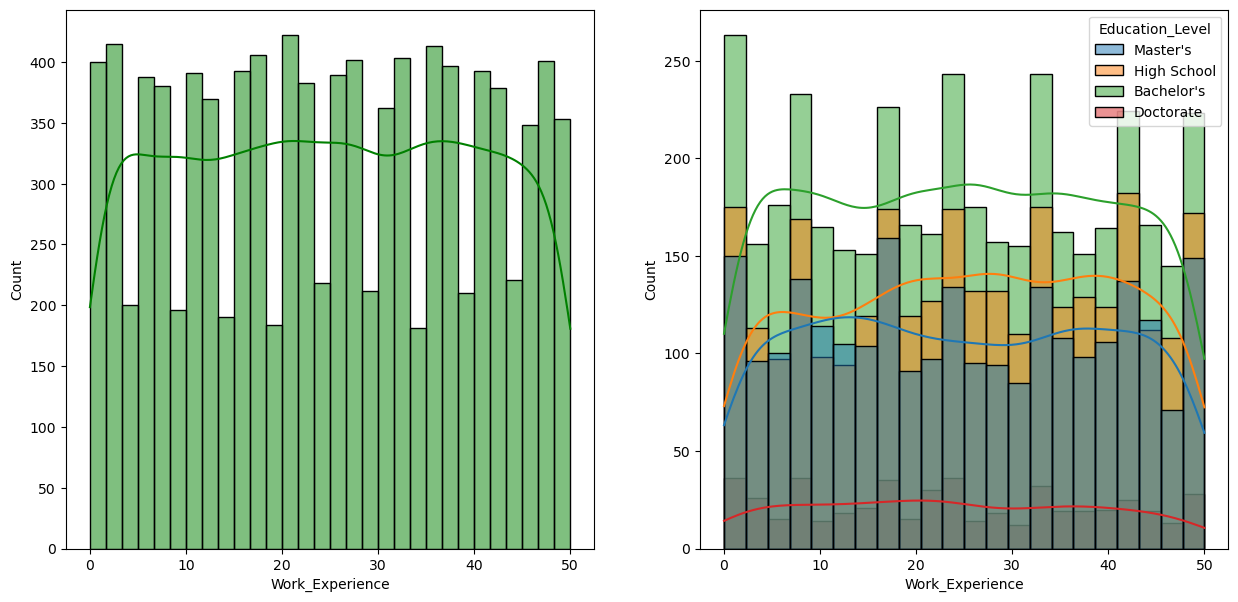

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Work_Experience',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Work_Experience',kde=True,hue='Education_Level')
plt.show()

#####  Insights
- The people with education level of bachelors tends to hold more working experience than others.
- The people with education level of doctorate tends to hold less working experience than others

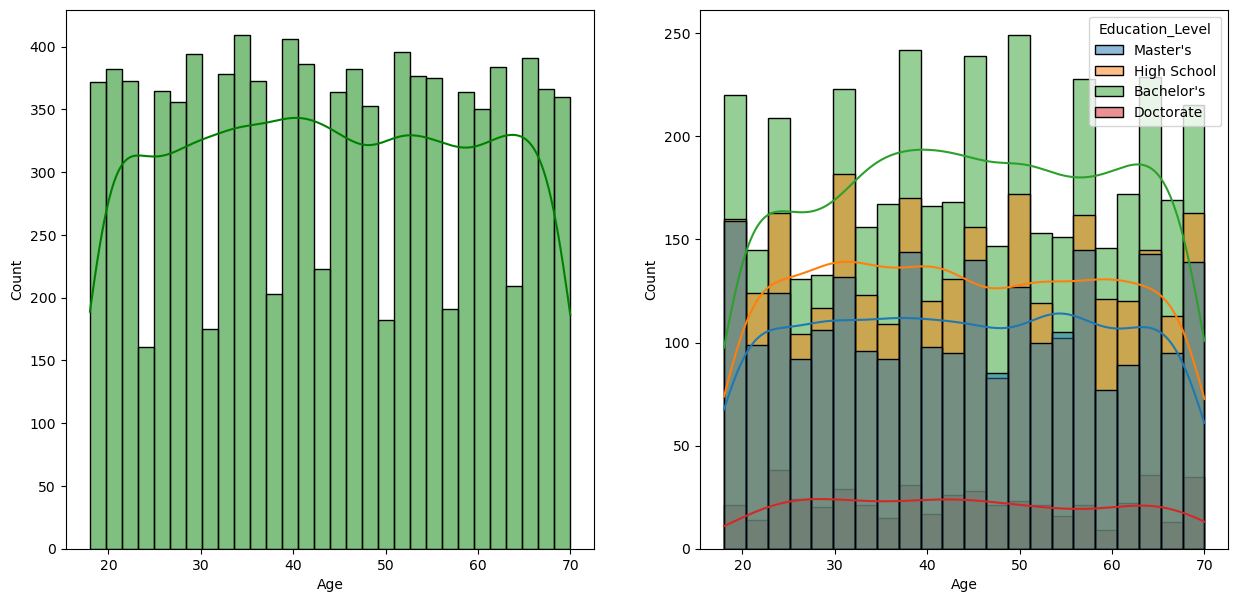

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Age',kde=True,hue='Education_Level')
plt.show()

#####  Insights
- More people tends to stop their education after the Bachelors.
- Less people tends to stop their education after the Doctorate. 

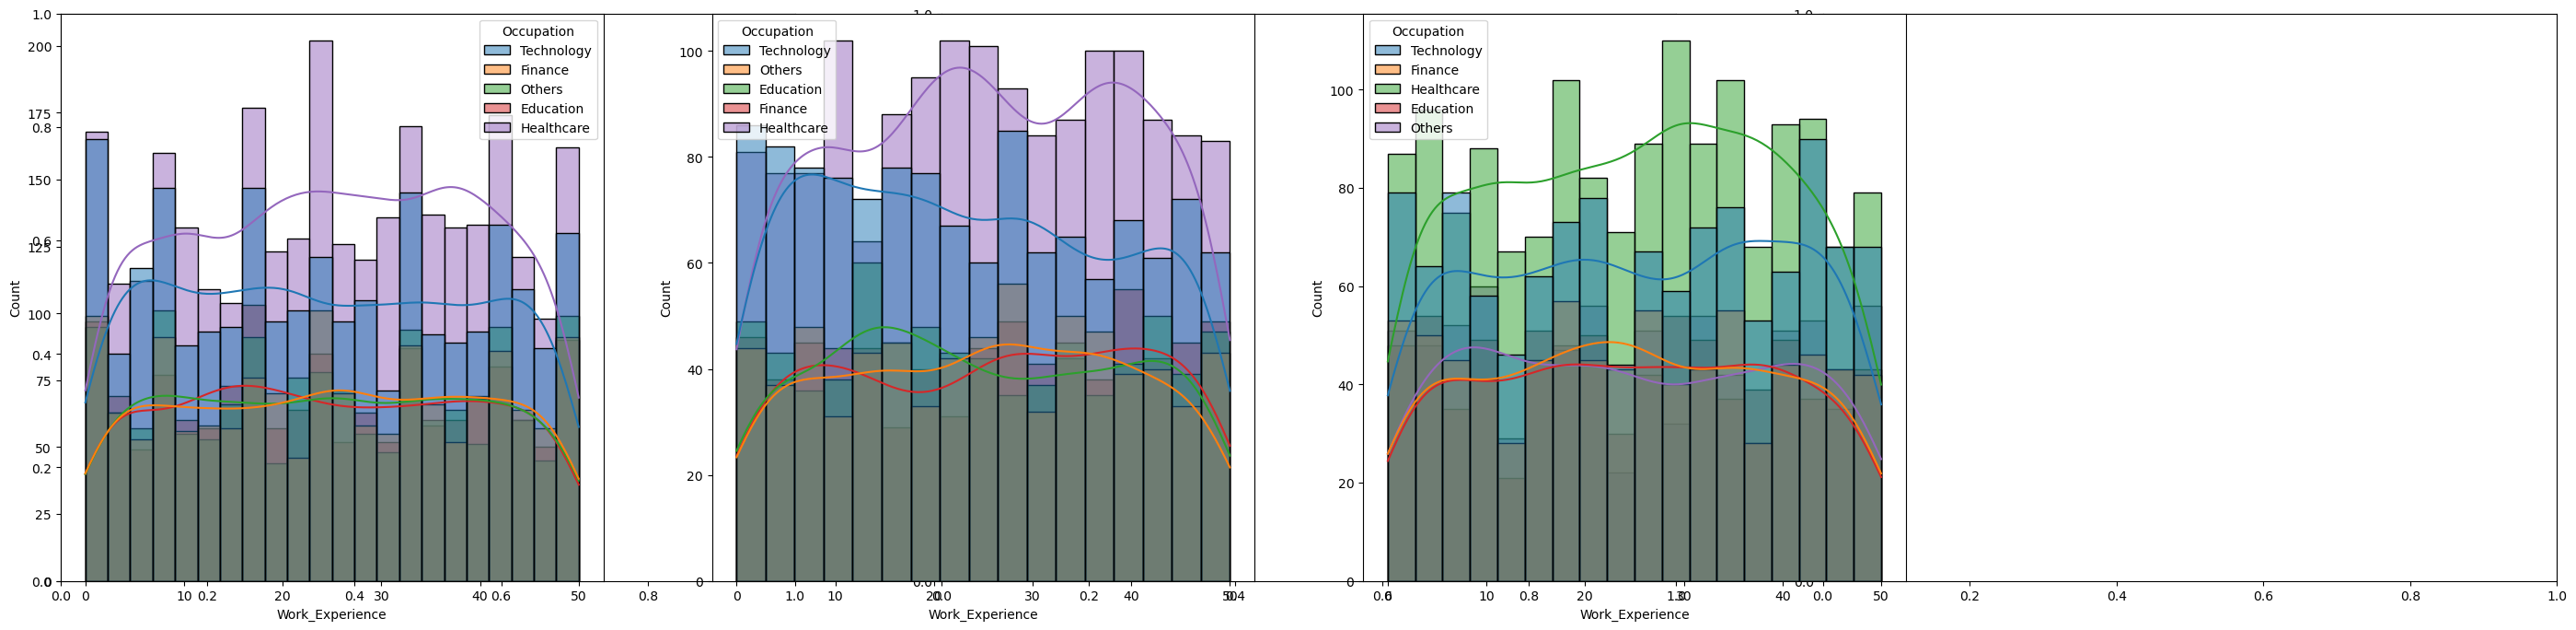

In [40]:
plt.subplots(1,3,figsize=(35,8))
plt.subplot(141)
sns.histplot(data=df,x='Work_Experience',kde=True,hue='Occupation')
plt.subplot(142)
sns.histplot(data=df[df.Gender=='Female'],x='Work_Experience',kde=True,hue='Occupation')
plt.subplot(143)
sns.histplot(data=df[df.Gender=='Male'],x='Work_Experience',kde=True,hue='Occupation')
plt.show()

#####  Insights
- More experienced Females tends to work in the field of Health Care then Technology
- More experienced Males tends to work in the field of Health Care then Technology

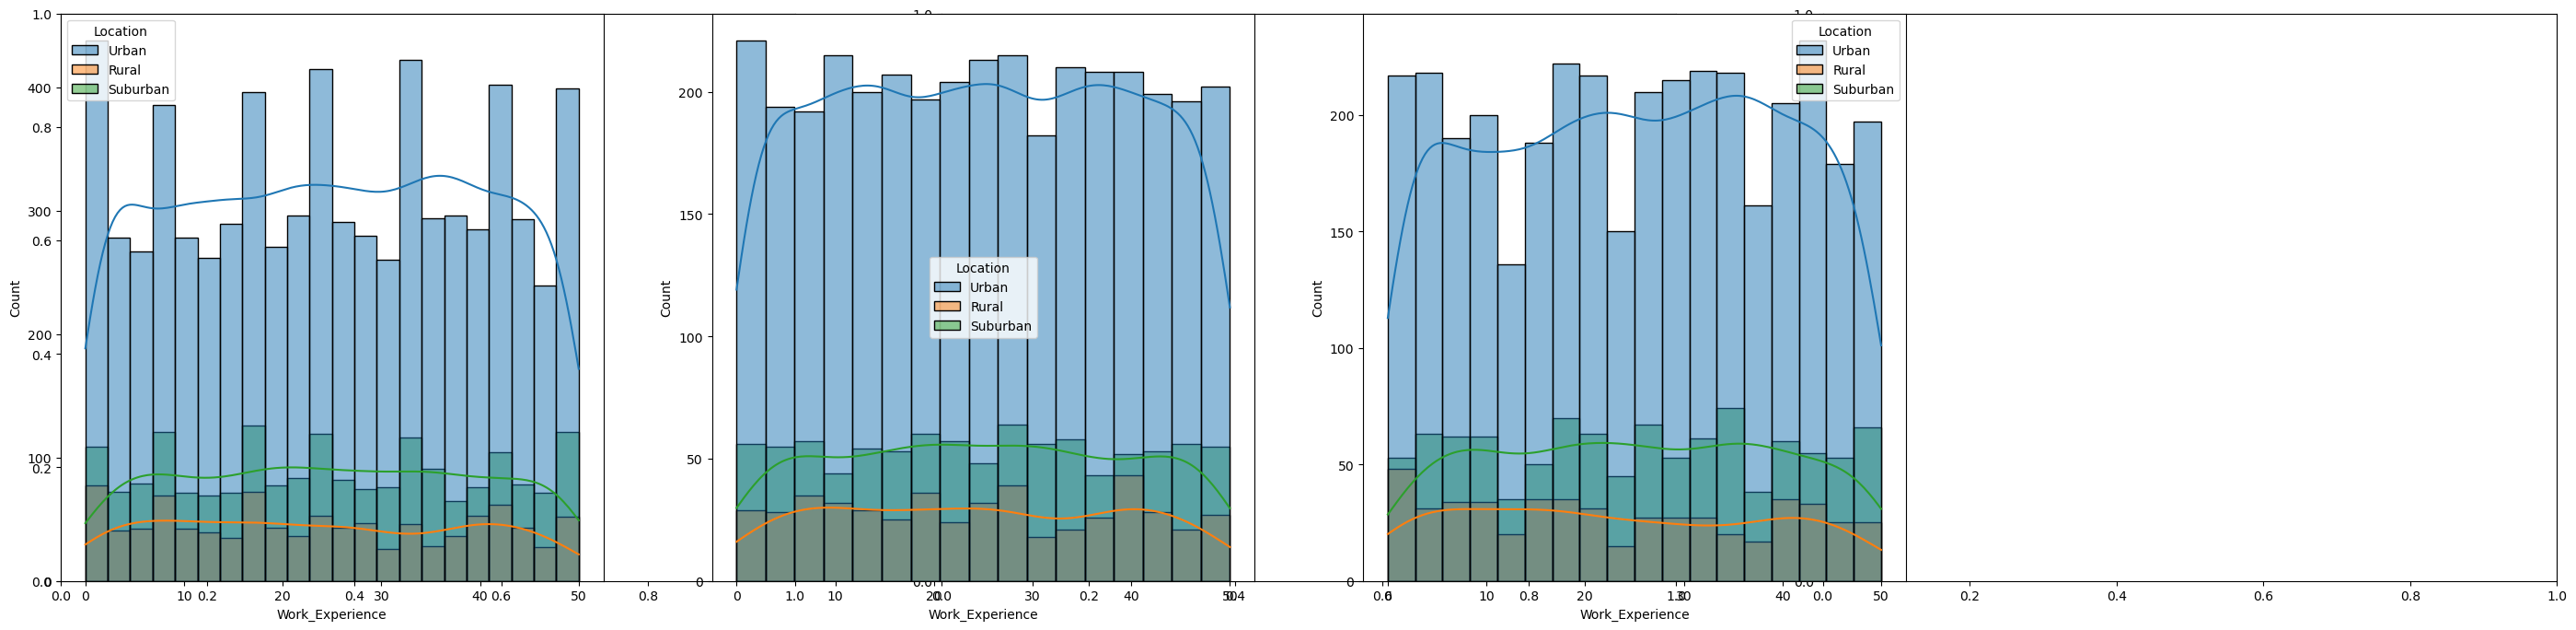

In [39]:
plt.subplots(1,3,figsize=(35,8))
plt.subplot(141)
sns.histplot(data=df,x='Work_Experience',kde=True,hue='Location')
plt.subplot(142)
sns.histplot(data=df[df.Gender=='Female'],x='Work_Experience',kde=True,hue='Location')
plt.subplot(143)
sns.histplot(data=df[df.Gender=='Male'],x='Work_Experience',kde=True,hue='Location')
plt.show()

#####  Insights
- Most of the experienced workforce comes from the urban areas
- Less amount of the experienced workforce comes from the rural and suburban areas.

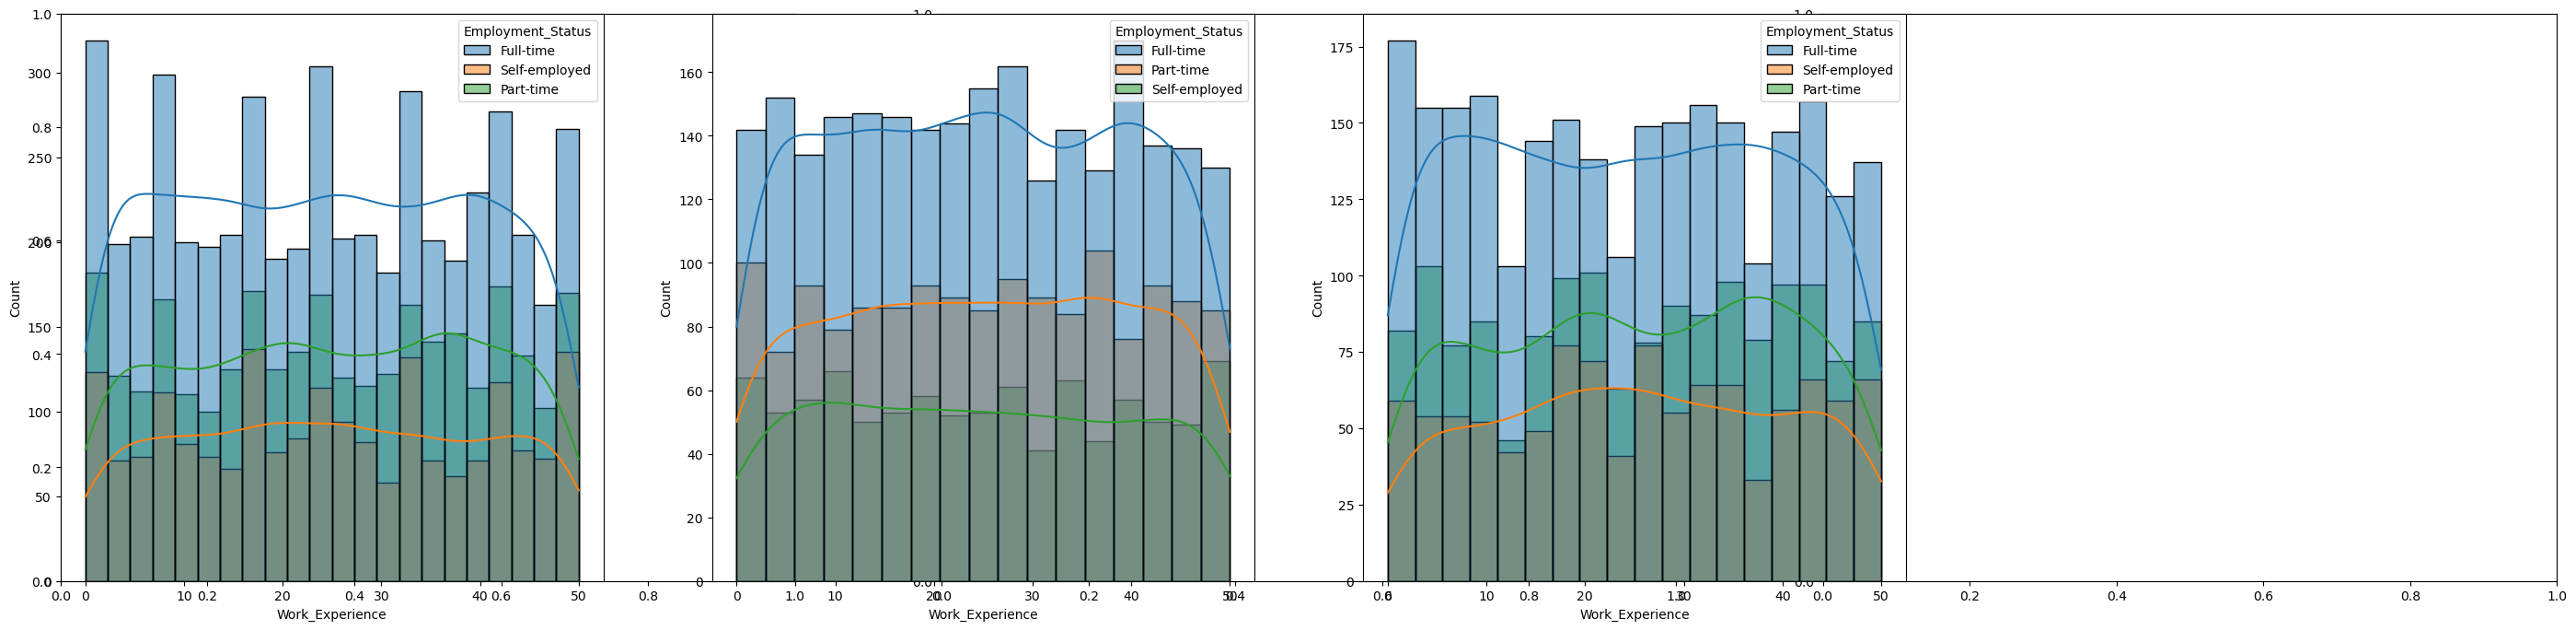

In [38]:
plt.subplots(1,3,figsize=(35,8))
plt.subplot(141)
sns.histplot(data=df,x='Work_Experience',kde=True,hue='Employment_Status')
plt.subplot(142)
sns.histplot(data=df[df.Gender=='Female'],x='Work_Experience',kde=True,hue='Employment_Status')
plt.subplot(143)
sns.histplot(data=df[df.Gender=='Male'],x='Work_Experience',kde=True,hue='Employment_Status')
plt.show()

#####  Insights
- Most of the experienced workforce works as full time employees

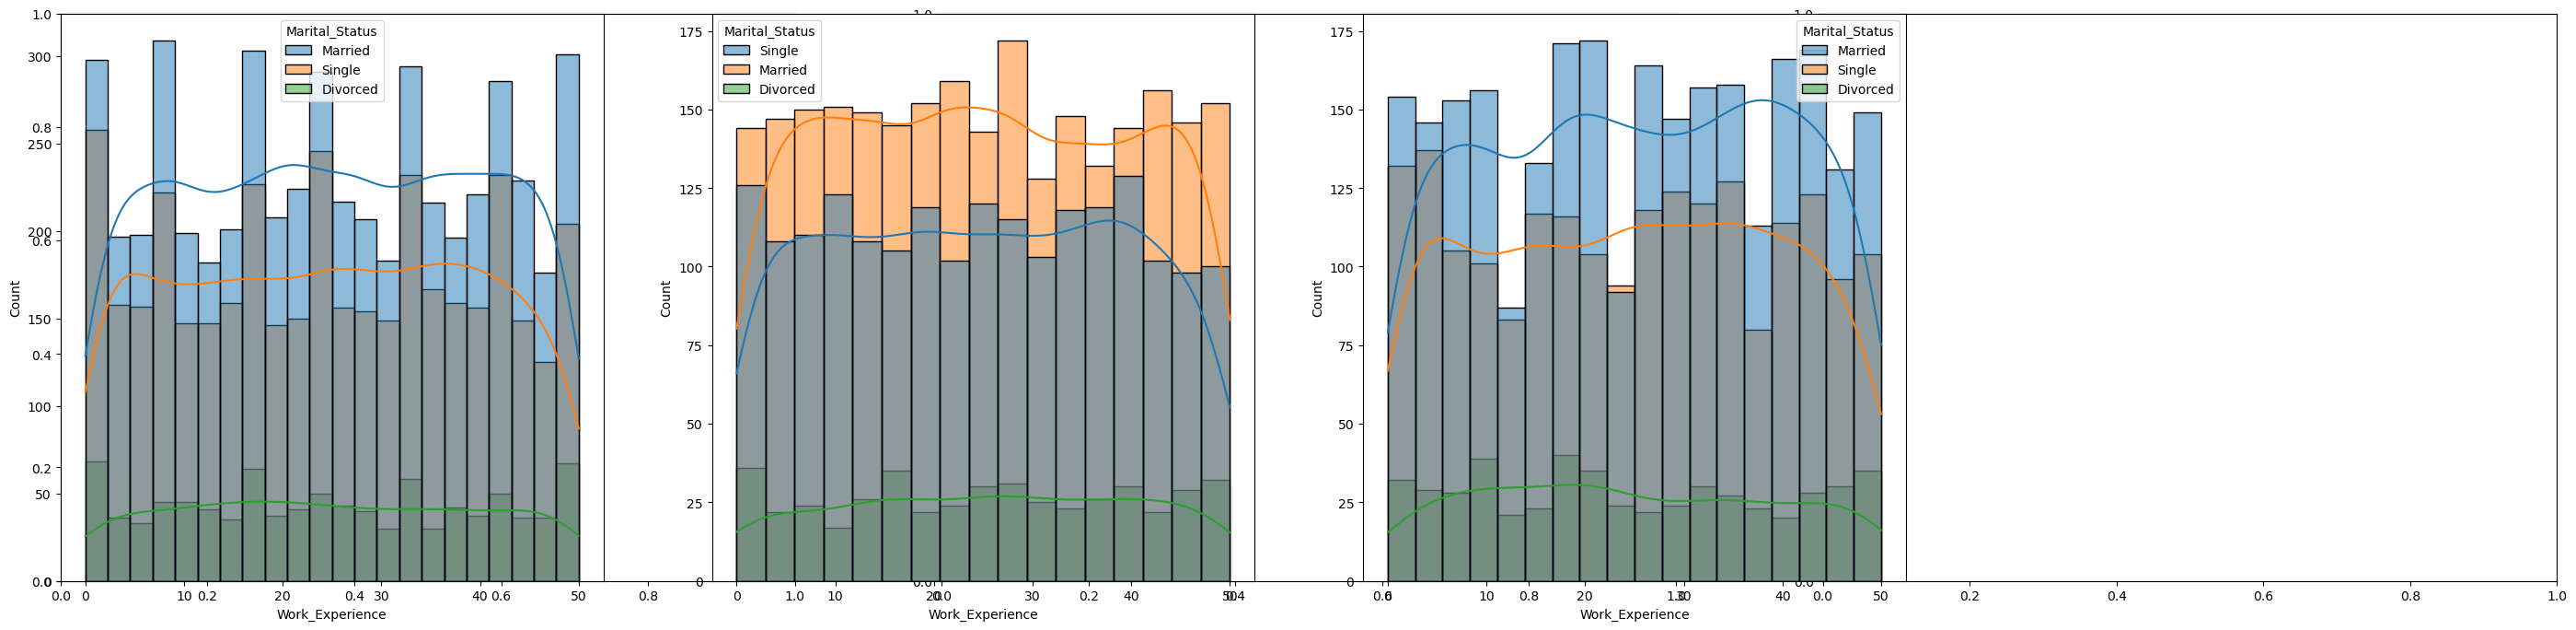

In [41]:
plt.subplots(1,3,figsize=(35,8))
plt.subplot(141)
sns.histplot(data=df,x='Work_Experience',kde=True,hue='Marital_Status')
plt.subplot(142)
sns.histplot(data=df[df.Gender=='Female'],x='Work_Experience',kde=True,hue='Marital_Status')
plt.subplot(143)
sns.histplot(data=df[df.Gender=='Male'],x='Work_Experience',kde=True,hue='Marital_Status')
plt.show()

#####  Insights
- Most of the experienced workforce are married 

#### 4.2 Maximumum Income Graph

<Axes: title={'center': 'Income'}, ylabel='Income'>

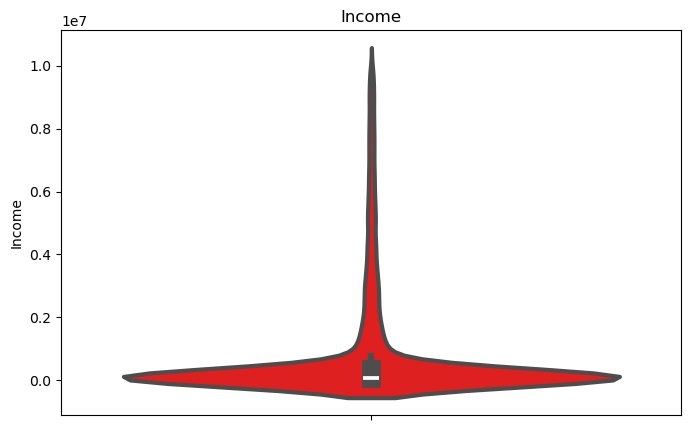

In [47]:
plt.figure(figsize=(8,5))
plt.title('Income')
sns.violinplot(y='Income',data=df,color='red',linewidth=3)

#### Insights
- From the above plots we can see that most of the employees are at the lower side of the income spectrum

#### 4.3 Multivariate analysis using pieplot

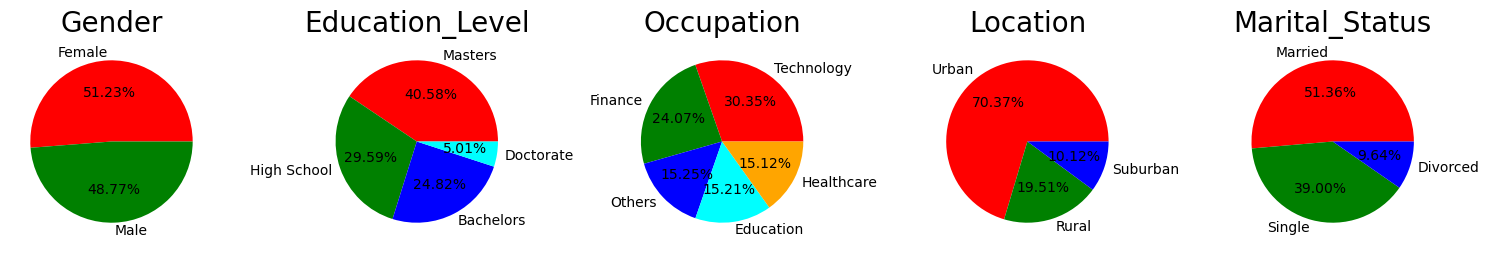

In [15]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.subplot(1, 5, 1)
size = df['Gender'].value_counts()
labels = ['Female', 'Male']
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['Education_Level'].value_counts()
labels = ['Masters', 'High School', 'Bachelors', 'Doctorate']
color = ['red', 'green', 'blue', 'cyan']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Education_Level', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['Occupation'].value_counts()
labels = ['Technology', 'Finance', 'Others', 'Education', 'Healthcare']
color = ['red','green','blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Occupation', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['Location'].value_counts()
labels = ['Urban', 'Rural', 'Suburban']
color = ['red','green','blue']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Location', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['Marital_Status'].value_counts()
labels = ['Married', 'Single', 'Divorced']
color = ['red', 'green', 'blue']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Marital_Status', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights
- Most of the wokring people are females.
- Most of the people wokring are having Masters.
- Most of the people are wokring in the field of Technology.
- Most of the wokring class resides in urban areas.
- Most of the employees are married.

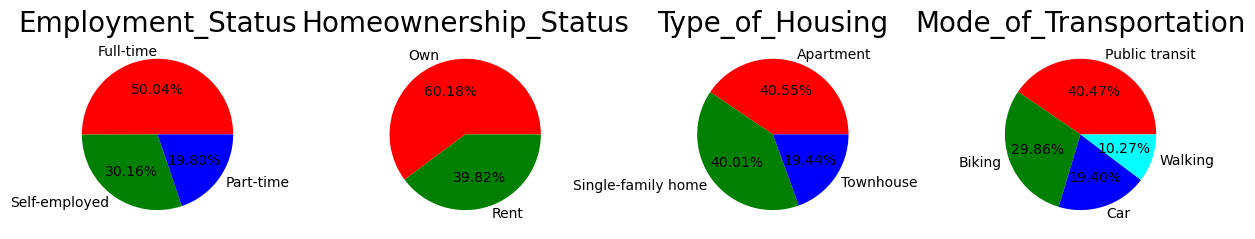

In [31]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.subplot(1, 5, 1)
size = df['Employment_Status'].value_counts()
labels = ['Full-time', 'Self-employed', 'Part-time']
color = ['red','green','blue',]

plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Employment_Status', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['Homeownership_Status'].value_counts()
labels = ['Own', 'Rent']
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Homeownership_Status', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['Type_of_Housing'].value_counts()
labels = ['Apartment', 'Single-family home', 'Townhouse']
color = ['red','green','blue']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Type_of_Housing', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['Primary_Mode_of_Transportation'].value_counts()
labels = ['Public transit', 'Biking', 'Car', 'Walking']
color = ['red','green','blue','cyan'] 

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Mode_of_Transportation', fontsize = 20)
plt.axis('off')



plt.tight_layout()
plt.grid()

plt.show()

#### Insights
- Most of the employees are working full time
- Most of the employees own their homes.
- Most of the employees live in apartments
- Most of the employees use public transit as their transport

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on Income ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

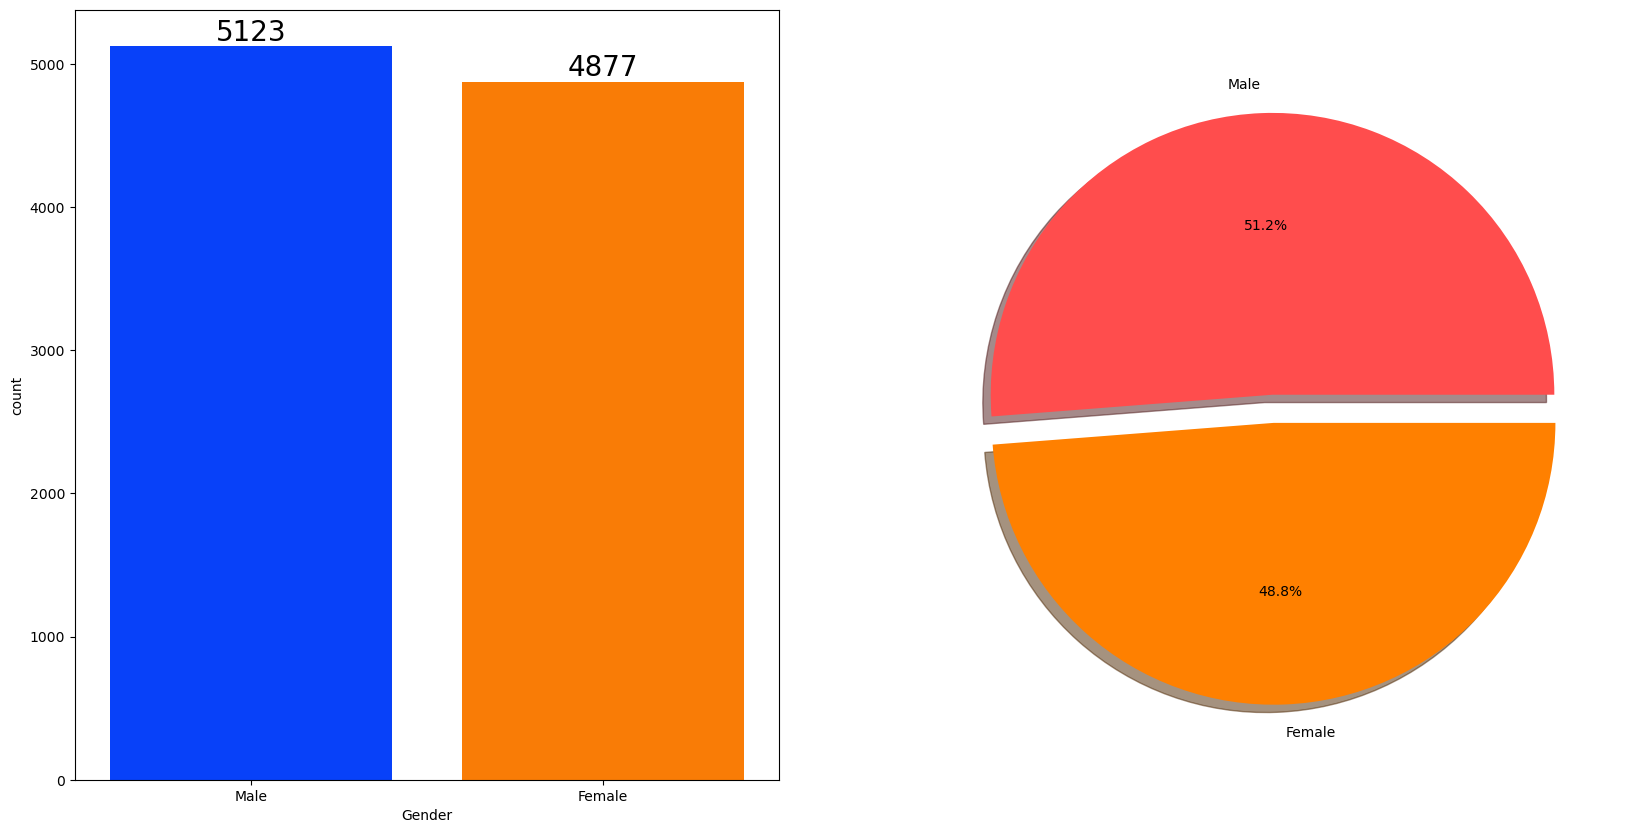

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights

- The dataset is balanced with 5123(51.2%) males and 4877(48.8%) females.

#### BIVARIATE ANALYSIS ( Is gender has any impact on Income ? ) 

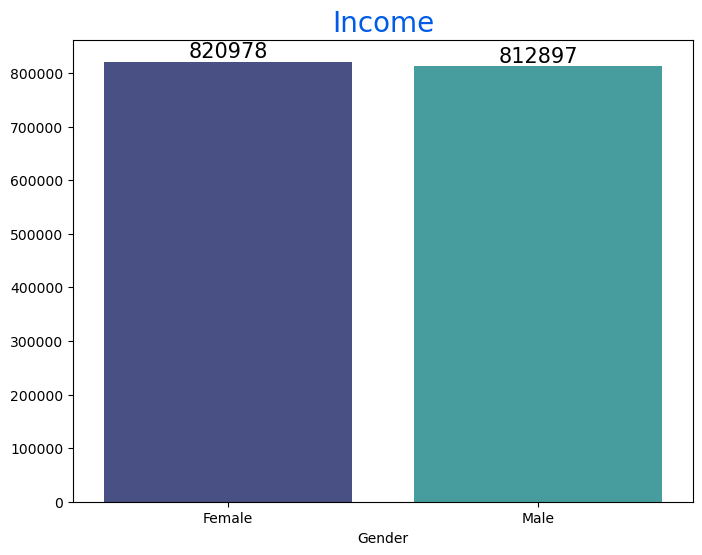

In [47]:
Group_data2 = df.groupby('Gender')

plt.figure(figsize=(8, 6)) 
sns.barplot(x=Group_data2['Income'].mean().index, 
            y=Group_data2['Income'].mean().values, 
            palette='mako')
plt.title('Income', color='#005ce6', size=20)

for container in plt.gca().containers:
    plt.gca().bar_label(container, color='black', size=15)

plt.show()

#### Insights

- On an average females earn more than males.

#### 4.4.2 EDUCATION LEVEL COLUMN
- How is distribution of Education Level ?
- Is Education level has any impact on Income ?

#### UNIVARIATE ANALYSIS ( How is distribution of Education Level ? )

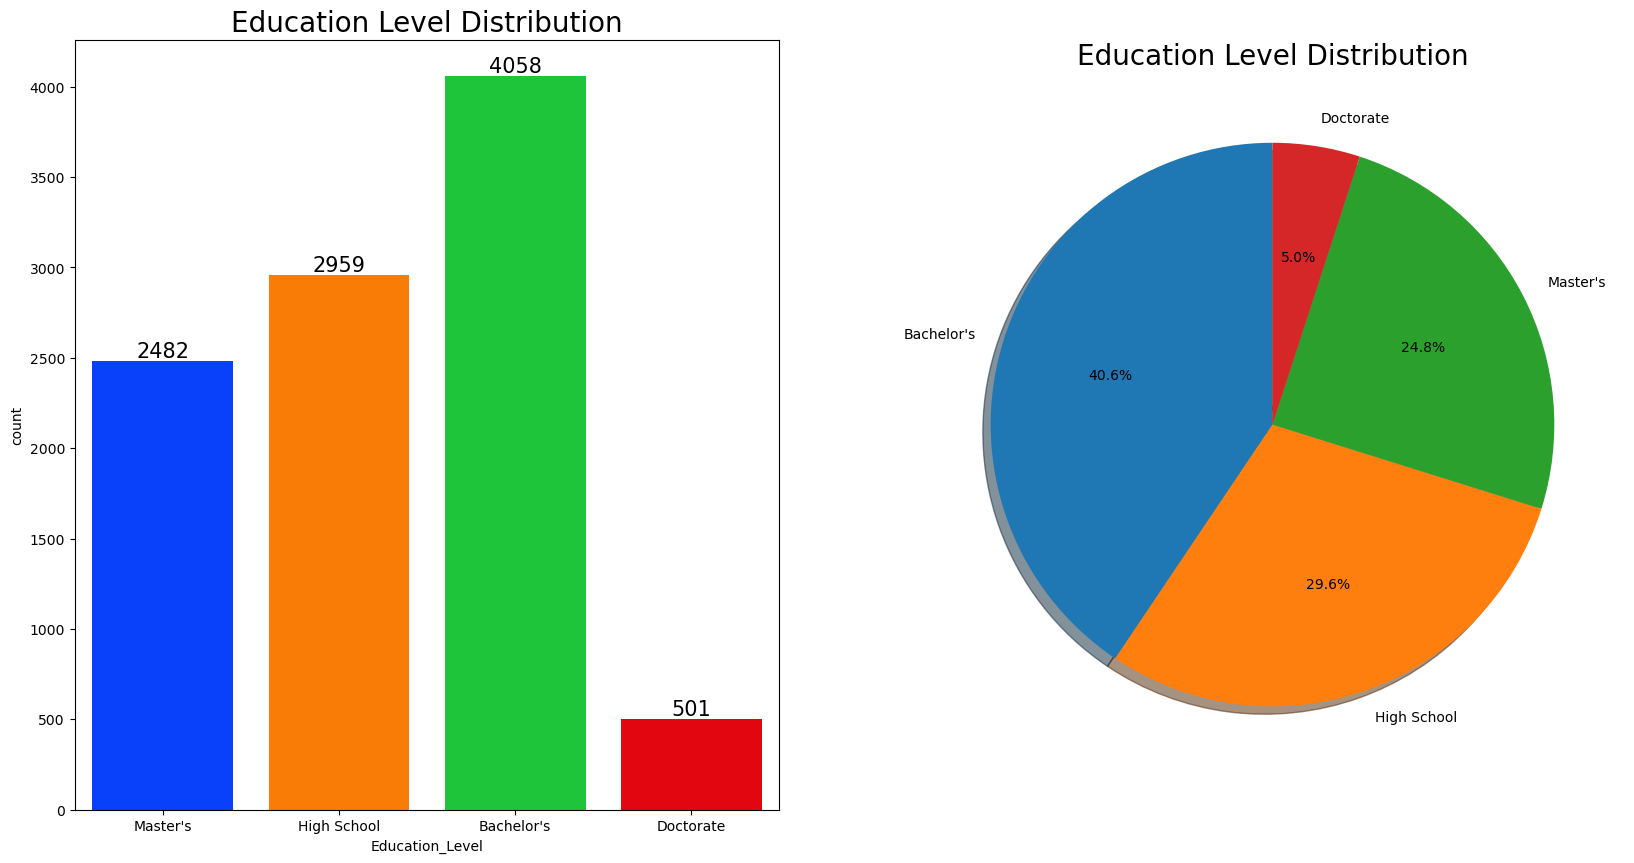

In [59]:
counts = df['Education_Level'].value_counts()

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='Education_Level', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Education Level Distribution', fontsize=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

ax[1].pie(counts, labels=counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('Education Level Distribution', fontsize=20)

plt.show()

#### Insights
- Highest nummber of the employees have done bachelor's.
- Lowest number of the employees have done doctorate.

#### BIVARIATE ANALYSIS ( Is Education Level has any impact on Income ? ) 

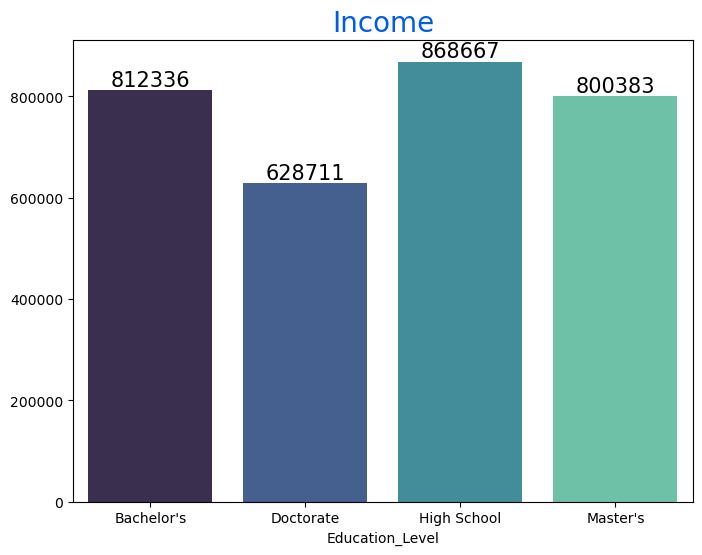

In [61]:
Group_data = df.groupby('Education_Level')

plt.figure(figsize=(8, 6)) 
sns.barplot(x=Group_data['Income'].mean().index, 
            y=Group_data['Income'].mean().values, 
            palette='mako')
plt.title('Income', color='#005ce6', size=20)

for container in plt.gca().containers:
    plt.gca().bar_label(container, color='black', size=15)

plt.show()

#### Insights
- Highest earners are from high school education level.

#### 4.4.3 OCCUPATION COLUMN
- How is distribution of Occupation ?
- Is Occupation has any impact on Income ?

#### UNIVARIATE ANALYSIS ( How is distribution of Occupation ? )

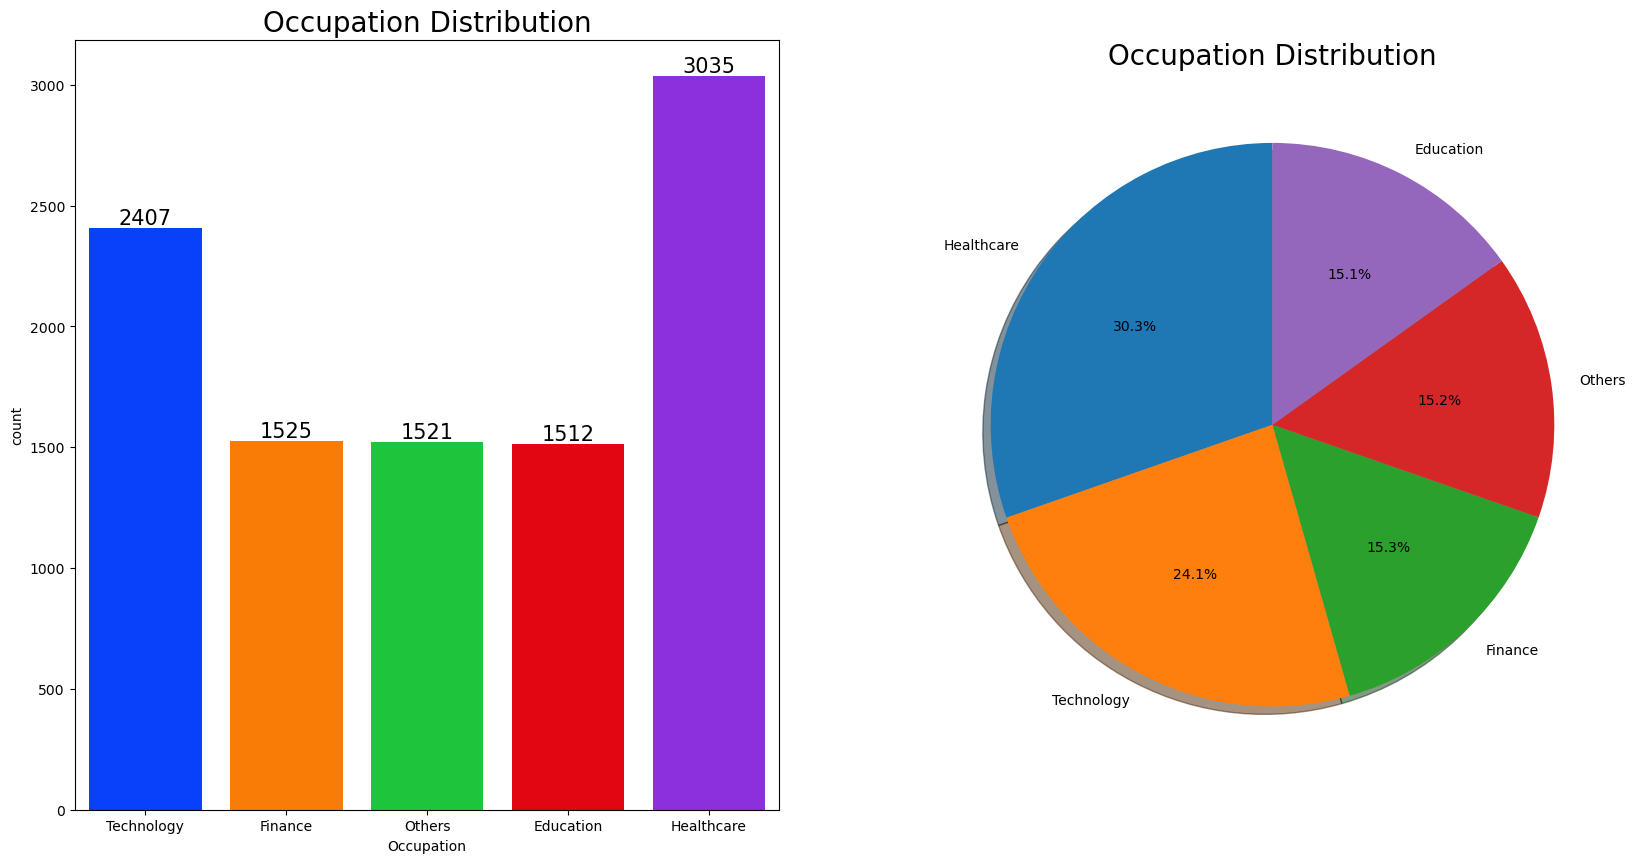

In [63]:
counts = df['Occupation'].value_counts()

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='Occupation', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Occupation Distribution', fontsize=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

ax[1].pie(counts, labels=counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('Occupation Distribution', fontsize=20)

plt.show()

#### BIVARIATE ANALYSIS ( Is Occupation has any impact on Income ? )

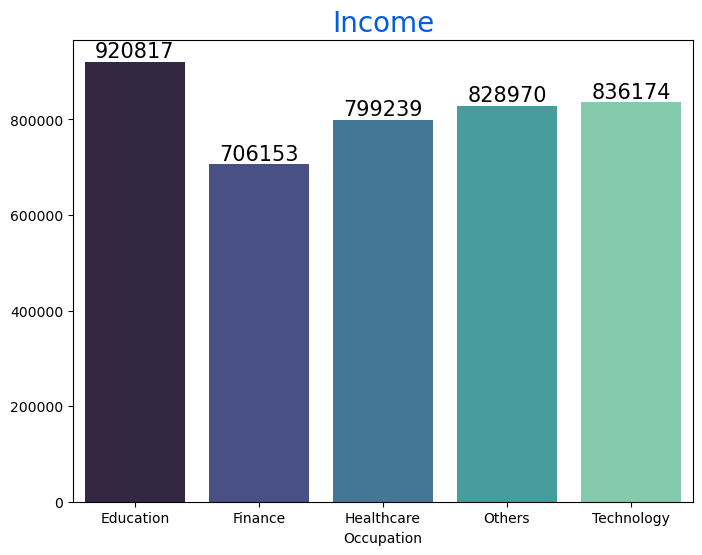

In [64]:
Group_data = df.groupby('Occupation')

plt.figure(figsize=(8, 6)) 
sns.barplot(x=Group_data['Income'].mean().index, 
            y=Group_data['Income'].mean().values, 
            palette='mako')
plt.title('Income', color='#005ce6', size=20)

for container in plt.gca().containers:
    plt.gca().bar_label(container, color='black', size=15)

plt.show()

#### Insights
- Most high earners belongs to education sector.

#### 4.4.4 LOCATION COLUMN
- How is distribution of Location?
- Is Location has any impact on Income ?

#### UNIVARIATE ANALYSIS ( How is distribution of Location ? )

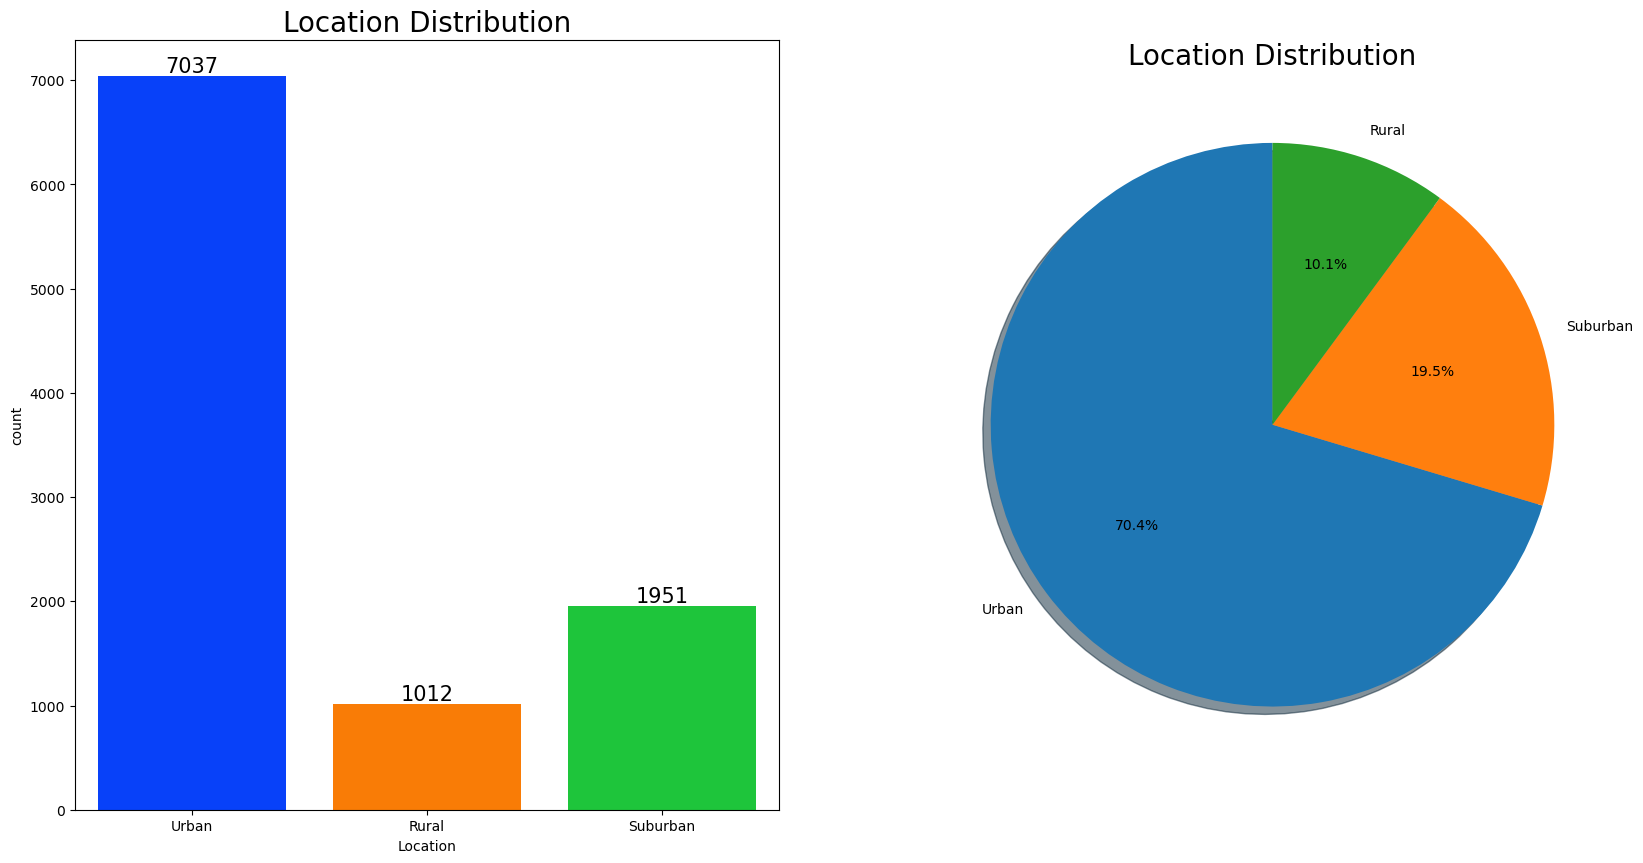

In [65]:
counts = df['Location'].value_counts()

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='Location', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Location Distribution', fontsize=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

ax[1].pie(counts, labels=counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('Location Distribution', fontsize=20)

plt.show()

#### Insights 
- Most of the employees resides in urban areas.

#### BIVARIATE ANALYSIS ( Is Location has any impact on Income ? )

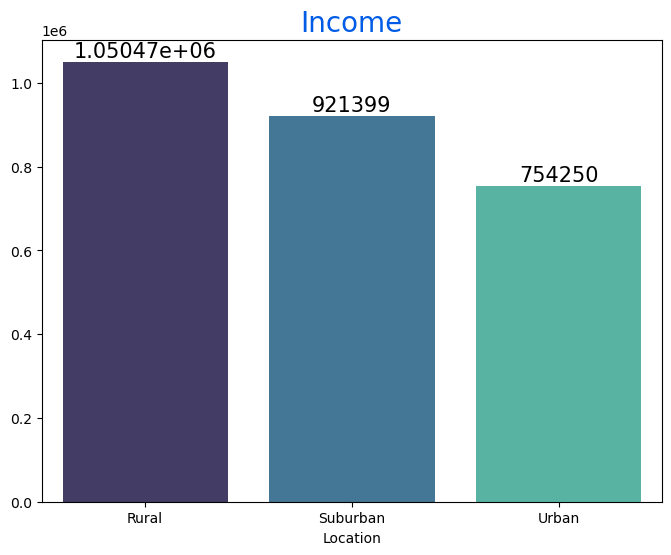

In [66]:
Group_data = df.groupby('Location')

plt.figure(figsize=(8, 6)) 
sns.barplot(x=Group_data['Income'].mean().index, 
            y=Group_data['Income'].mean().values, 
            palette='mako')
plt.title('Income', color='#005ce6', size=20)

for container in plt.gca().containers:
    plt.gca().bar_label(container, color='black', size=15)

plt.show()

#### Insights
- High earners resides in rural areas.

#### 4.4.5 MARITAL_STATUS COLUMN
- How is distribution of Marital_Status?
- Is Marital_Status has any impact on Income 

#### UNIVARIATE ANALYSIS ( How is distribution of Marital_Status ? )

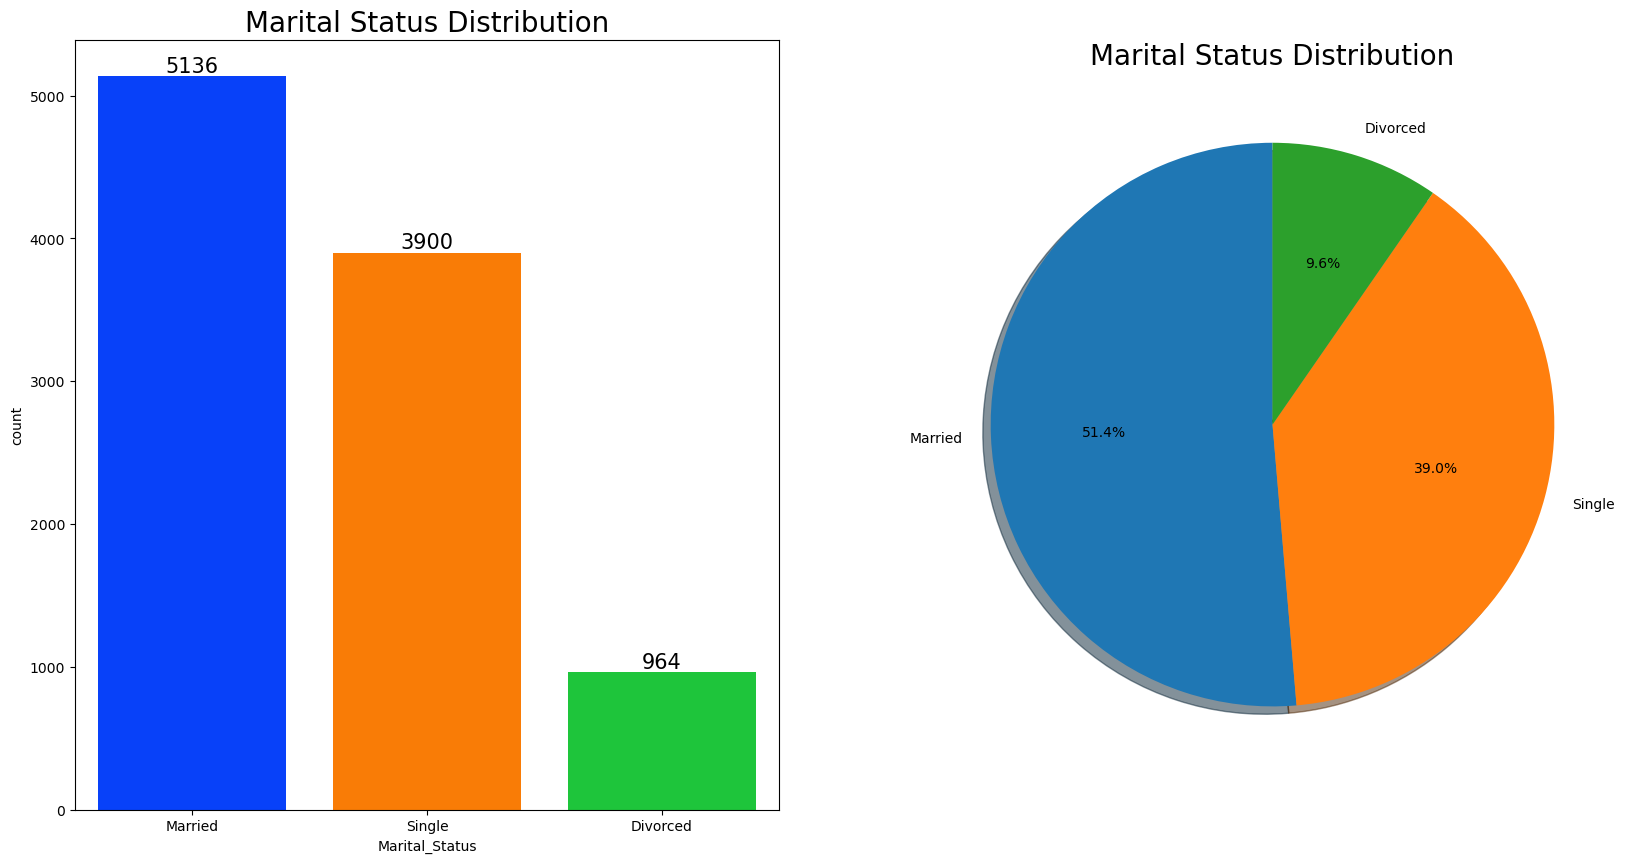

In [69]:
counts = df['Marital_Status'].value_counts()

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='Marital_Status', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Marital Status Distribution', fontsize=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

ax[1].pie(counts, labels=counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('Marital Status Distribution', fontsize=20)

plt.show()

#### Insights
- Most of the wokring class are married.

#### BIVARIATE ANALYSIS ( Is Marital_Status has any impact on Income ? )

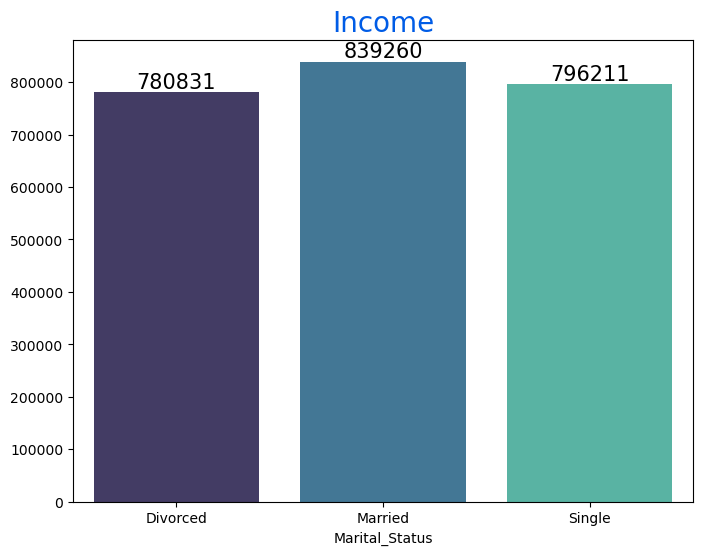

In [70]:
Group_data = df.groupby('Marital_Status')

plt.figure(figsize=(8, 6)) 
sns.barplot(x=Group_data['Income'].mean().index, 
            y=Group_data['Income'].mean().values, 
            palette='mako')
plt.title('Income', color='#005ce6', size=20)

for container in plt.gca().containers:
    plt.gca().bar_label(container, color='black', size=15)

plt.show()

#### Insights
- On an average employees that are married earn more.

#### 4.4.6 EMPLOYMENT_STATUS COLUMN
- How is distribution of Employment_Status?
- Is Employment_Status has any impact on Income ?

#### UNIVARIATE ANALYSIS ( How is distribution of Employment_Status ? )

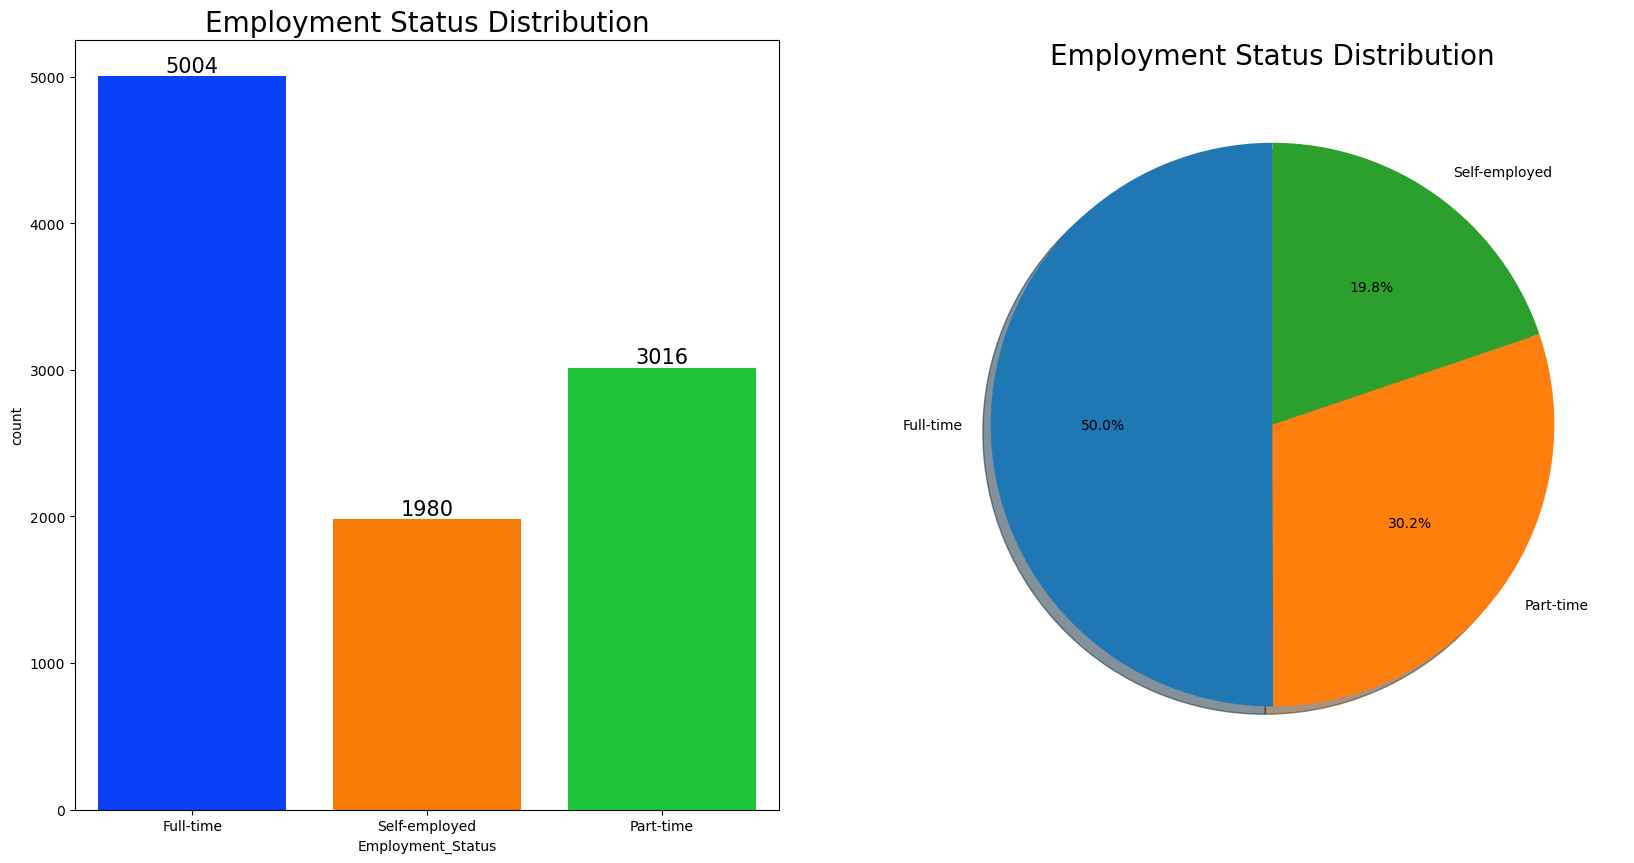

In [71]:
counts = df['Employment_Status'].value_counts()

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='Employment_Status', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Employment Status Distribution', fontsize=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

ax[1].pie(counts, labels=counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('Employment Status Distribution', fontsize=20)

plt.show()

#### Insights
- Most of the employees work as a full time employees.  

#### BIVARIATE ANALYSIS ( Is Employment_Status has any impact on Income ? )

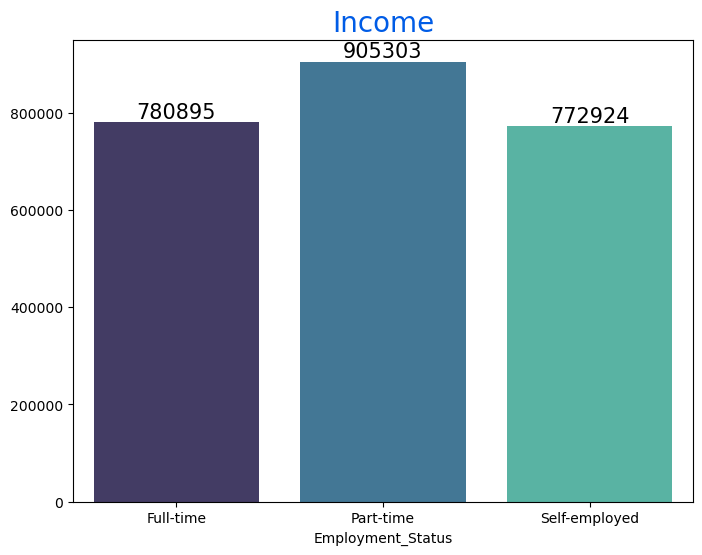

In [72]:
Group_data = df.groupby('Employment_Status')

plt.figure(figsize=(8, 6)) 
sns.barplot(x=Group_data['Income'].mean().index, 
            y=Group_data['Income'].mean().values, 
            palette='mako')
plt.title('Income', color='#005ce6', size=20)

for container in plt.gca().containers:
    plt.gca().bar_label(container, color='black', size=15)

plt.show()

#### Insights
- On an average Part time workers earn more than the others. 

#### 4.4.7 HOMEOWNERSHIP_STATUS COLUMN
- How is distribution of Homeonwership_Status?
- Is Homeonwership_Status has any impact on Income ?

#### UNIVARIATE ANALYSIS ( How is distribution of Homeonwership_Status ? )

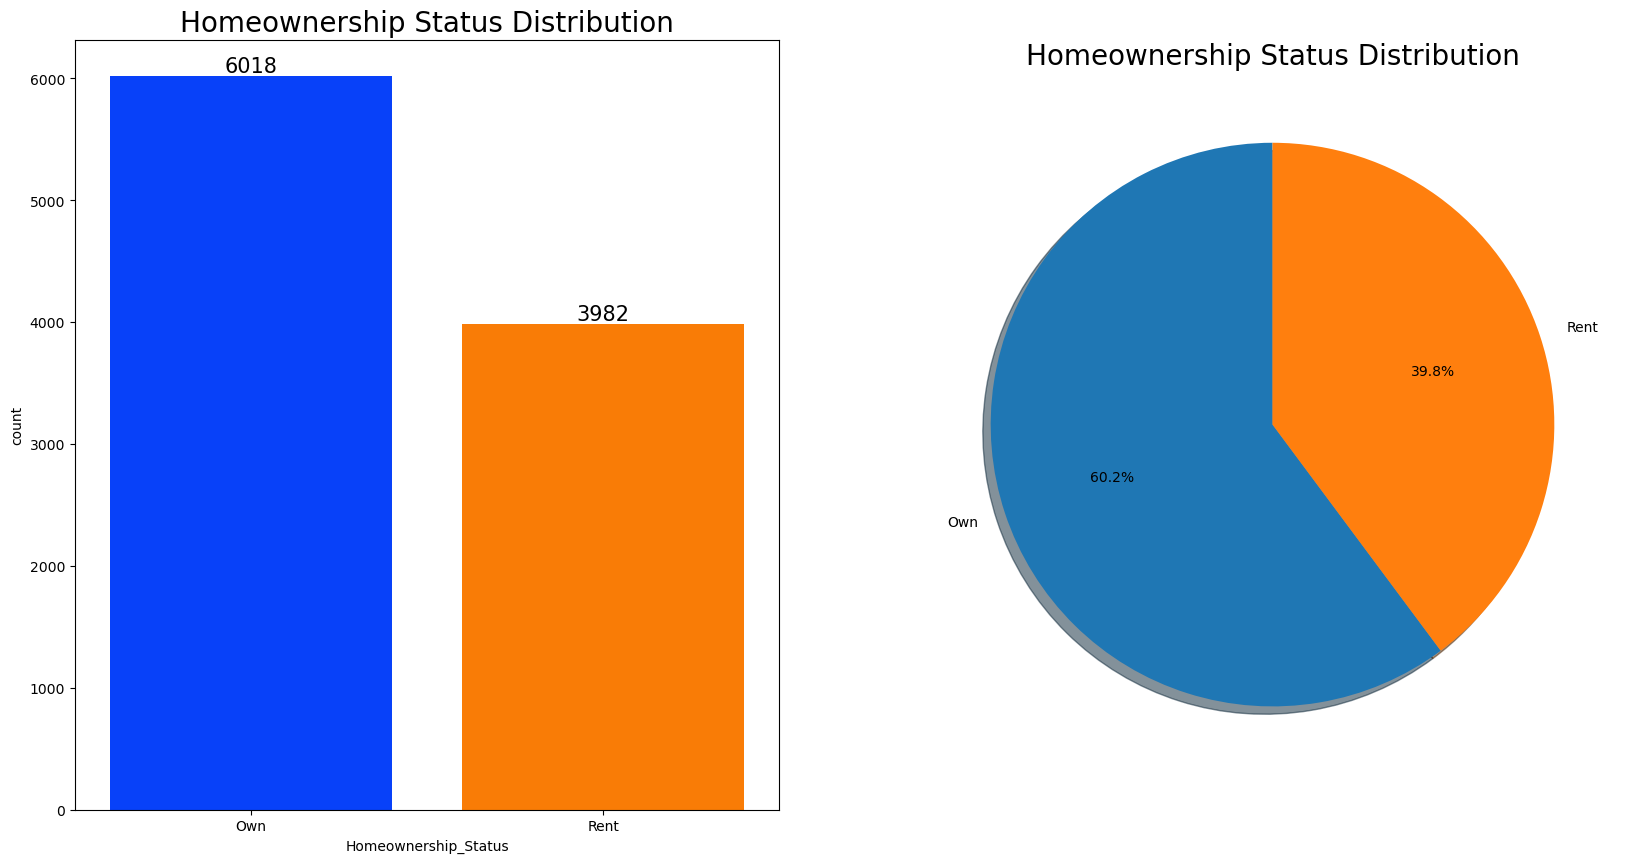

In [76]:
counts = df['Homeownership_Status'].value_counts()

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='Homeownership_Status', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Homeownership Status Distribution', fontsize=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

ax[1].pie(counts, labels=counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('Homeownership Status Distribution', fontsize=20)

plt.show()

#### Insights
- Majority of the employees resides in their own home.

#### BIVARIATE ANALYSIS ( Is Homeownership_Status has any impact on Income ? )

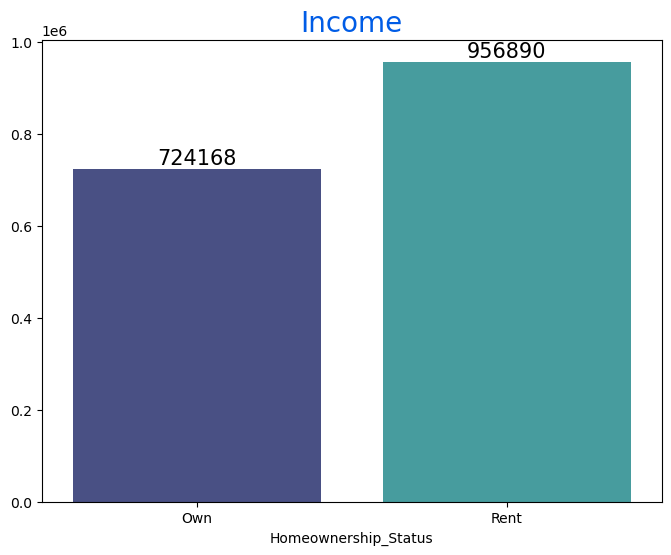

In [77]:
Group_data = df.groupby('Homeownership_Status')

plt.figure(figsize=(8, 6)) 
sns.barplot(x=Group_data['Income'].mean().index, 
            y=Group_data['Income'].mean().values, 
            palette='mako')
plt.title('Income', color='#005ce6', size=20)

for container in plt.gca().containers:
    plt.gca().bar_label(container, color='black', size=15)

plt.show()

#### Insights
- On average most of the high earners are living on rent.

#### 4.4.8 TYPE_OF_HOUSING COLUMN
- How is distribution of Type_of_Housing ?
- Is Type_of_Housing has any impact on Income ?

#### UNIVARIATE ANALYSIS ( How is distribution of Type_of_Housing ? )

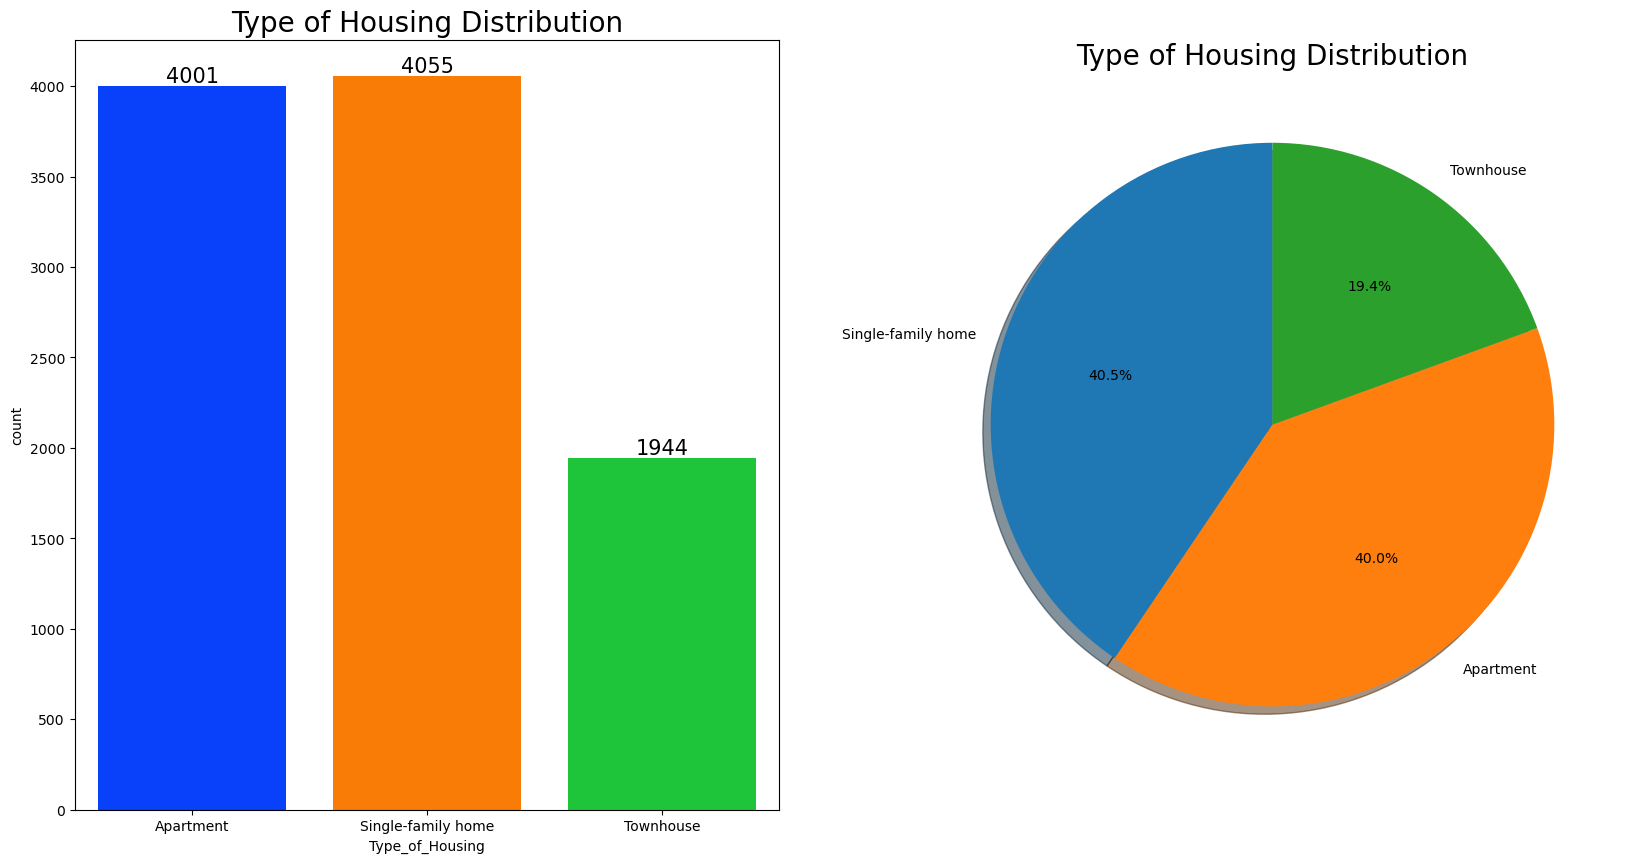

In [78]:
counts = df['Type_of_Housing'].value_counts()

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='Type_of_Housing', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Type of Housing Distribution', fontsize=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

ax[1].pie(counts, labels=counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('Type of Housing Distribution', fontsize=20)

plt.show()

#### Insights
- Most of the wokers tends to live in Single-family house.

#### BIVARIATE ANALYSIS ( Is Type_of_Housing has any impact on Income ? )

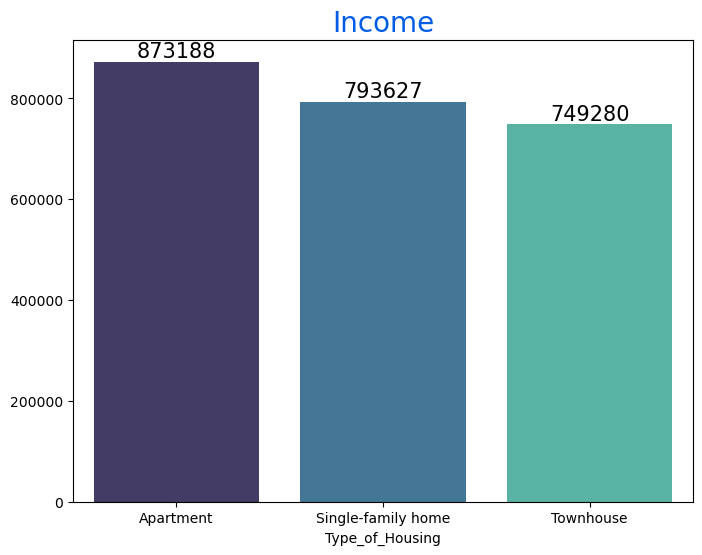

In [79]:
Group_data = df.groupby('Type_of_Housing')

plt.figure(figsize=(8, 6)) 
sns.barplot(x=Group_data['Income'].mean().index, 
            y=Group_data['Income'].mean().values, 
            palette='mako')
plt.title('Income', color='#005ce6', size=20)

for container in plt.gca().containers:
    plt.gca().bar_label(container, color='black', size=15)

plt.show()

#### Insights
- On an average most of the high earners live in apartment

#### 4.4.9 PRIMARY_MODE_OF_TRANSPORTATION COLUMN
- How is distribution of Primary_Mode_of_Transportation ?
- Is Primary_Mode_of_Transportation has any impact on Income 

#### UNIVARIATE ANALYSIS ( How is distribution of Primary_Mode_of_Transportation ? )

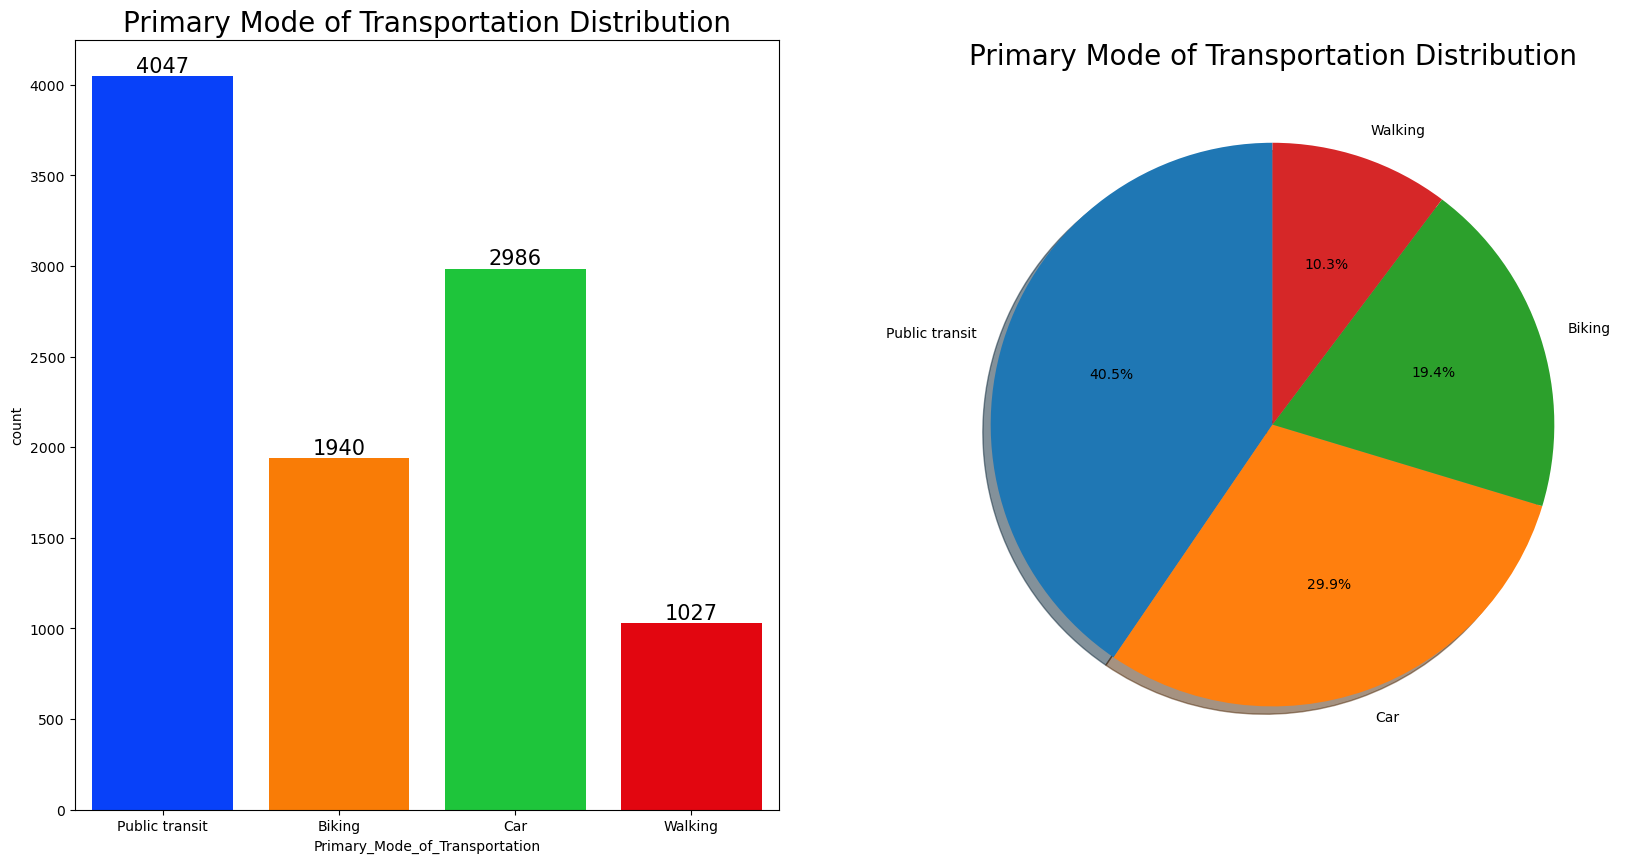

In [81]:
counts = df['Primary_Mode_of_Transportation'].value_counts()

f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='Primary_Mode_of_Transportation', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Primary Mode of Transportation Distribution', fontsize=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

ax[1].pie(counts, labels=counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('Primary Mode of Transportation Distribution', fontsize=20)

plt.show()

#### Insights
- Most of the wokers use public transport for transportation.

#### BIVARIATE ANALYSIS ( Is Primary_Mode_of_Transportation has any impact on Income ? )

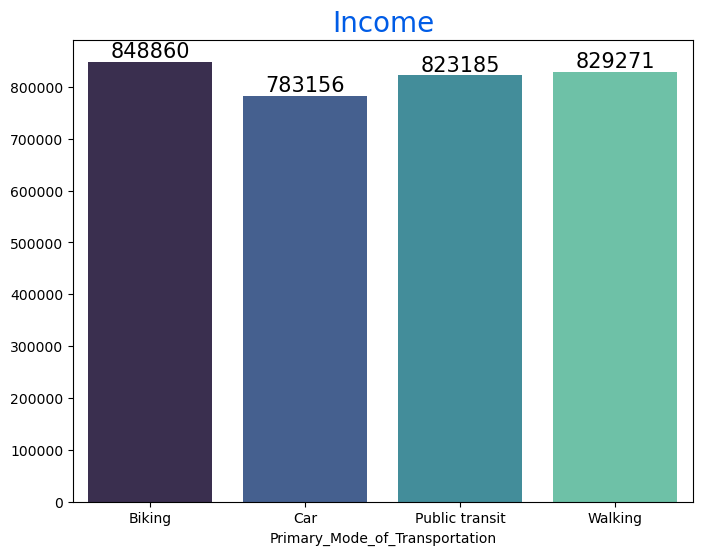

In [82]:
Group_data = df.groupby('Primary_Mode_of_Transportation')

plt.figure(figsize=(8, 6)) 
sns.barplot(x=Group_data['Income'].mean().index, 
            y=Group_data['Income'].mean().values, 
            palette='mako')
plt.title('Income', color='#005ce6', size=20)

for container in plt.gca().containers:
    plt.gca().bar_label(container, color='black', size=15)

plt.show()

#### Insights
- On an average most of the high earners use biking as their transportation

#### 4.4.10 CHECKING OUTLIERS

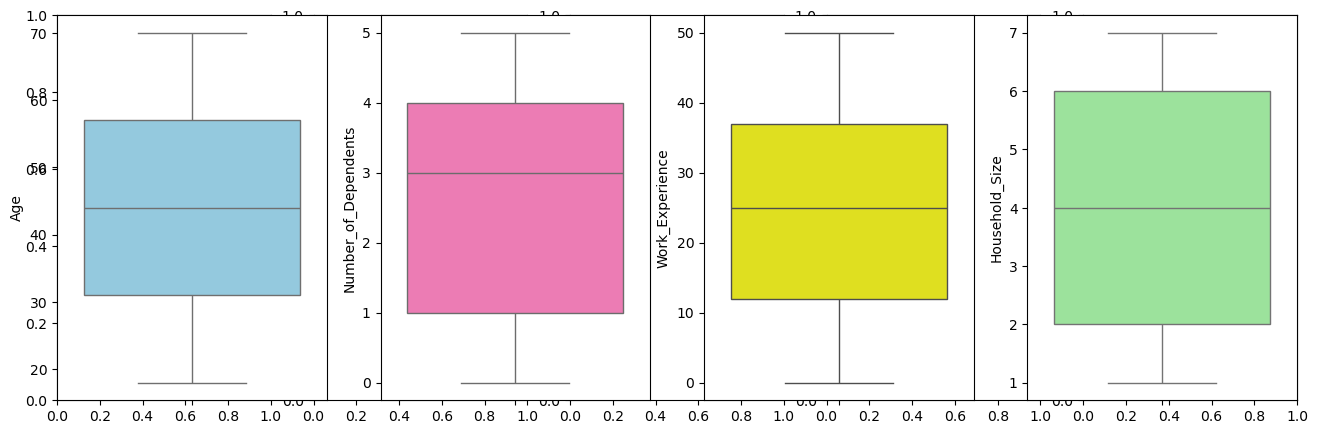

In [85]:
plt.subplots(1,5,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Age'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['Number_of_Dependents'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['Work_Experience'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Household_Size'],color='lightgreen')
plt.show()

#### 4.4.11 MUTIVARIATE ANALYSIS USING PAIRPLOT

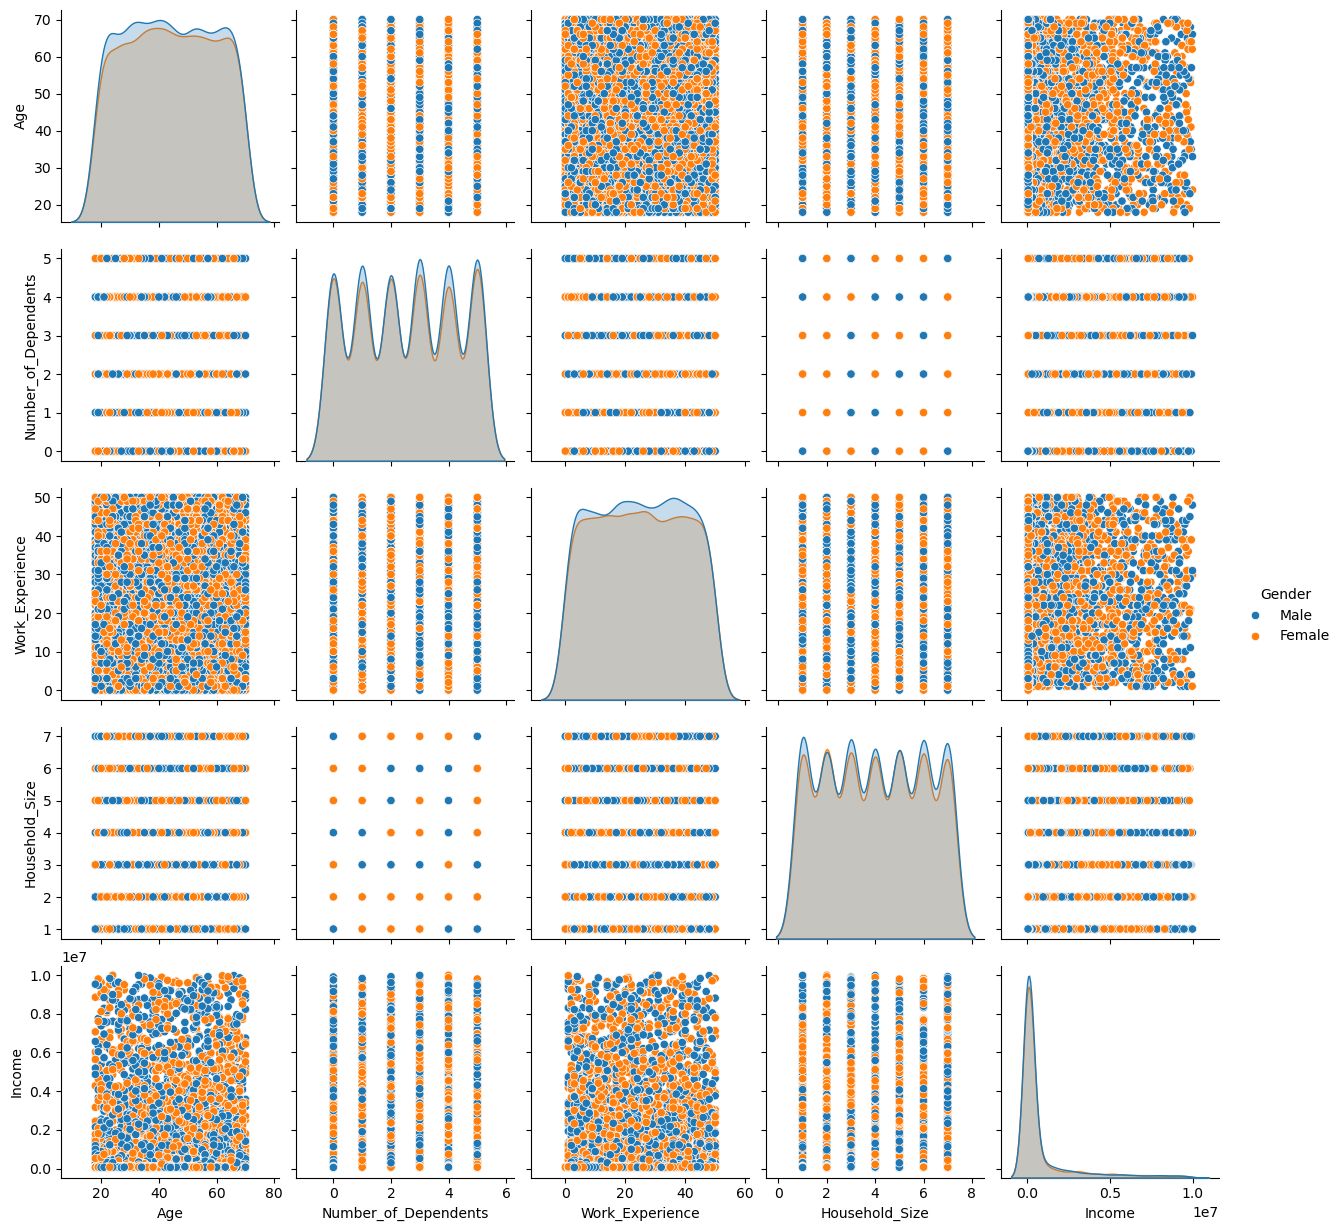

In [91]:
sns.pairplot(df,hue = 'Gender')
plt.show()

### 5. Conclusions
- All of the categorical variables are related to the income.
- Age and Work_Experience are most important numerical variables.
- Number of dependents and household size is not much related to income.